In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense, Dropout
import math
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
#from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [2]:
data = pd.read_csv('zuerich-monthly-sunspot-numbers.csv')
data.head(14)

,Month,Sunspot
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


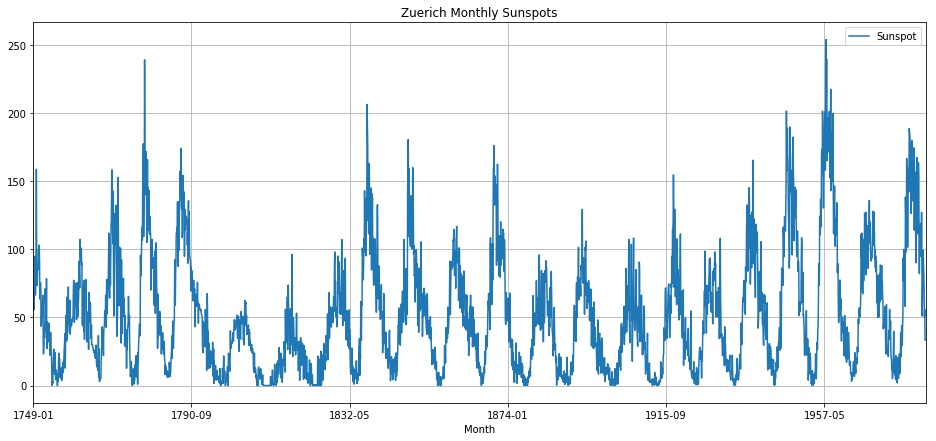

In [3]:
data.plot(x='Month', y='Sunspot', figsize=(16, 7))
plt.title('Zuerich Monthly Sunspots')
plt.grid(True)

In [45]:
data.Sunspot.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2792    False
2793    False
2794    False
2795    False
2796    False
2797    False
2798    False
2799    False
2800    False
2801    False
2802    False
2803    False
2804    False
2805    False
2806    False
2807    False
2808    False
2809    False
2810    False
2811    False
2812    False
2813    False
2814    False
2815    False
2816    False
2817    False
2818    False
2819    False
2820     True
2821     True
Name: Sunspot, Length: 2822, dtype: bool

In [4]:
dataf = data.dropna()
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 2822 | Colunas: 2'

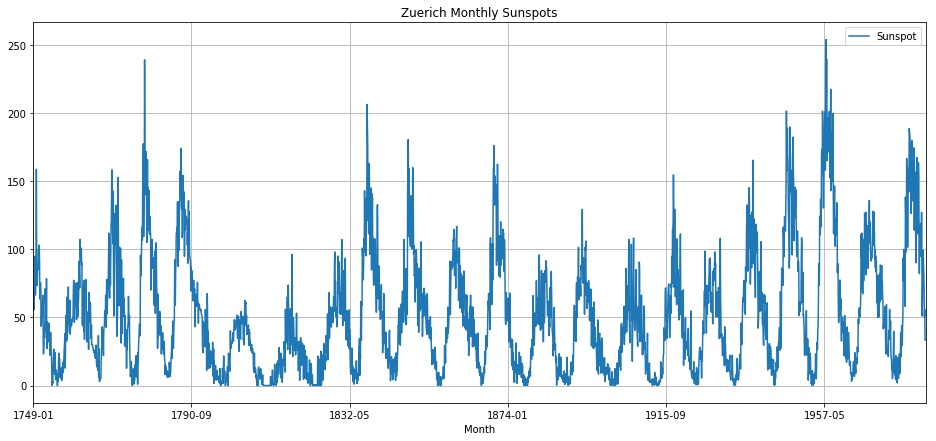

In [5]:
data.plot(x='Month', y='Sunspot', figsize=(16, 7))
plt.title('Zuerich Monthly Sunspots')
plt.grid(True)

In [6]:
rol_mean = data['Sunspot'].rolling(window=12).mean()
rol_std = data['Sunspot'].rolling(window=12).std()

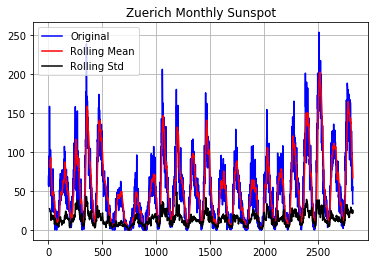

In [7]:
original = plt.plot(data['Sunspot'], color='blue', label='Original')
mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
std = plt.plot(rol_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Zuerich Monthly Sunspot')
plt.grid(True)
plt.show(block=False)

In [8]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if (end_ix > len(sequence)-1): break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [9]:
step = 5

In [10]:
X, y = split_sequence(sequence=dataf['Sunspot'], n_steps=step)

In [11]:
X_train = X[:math.floor(len(X)*0.3)]
X_test = X[math.floor(len(X)*0.3):]
y_train = y[:math.floor(len(X)*0.3)]
y_test = y[math.floor(len(X)*0.3):]

In [12]:
mlp = Sequential()

mlp.add(
    Dense(
        units=2,
        activation='relu',
        kernel_initializer='random_normal',
        input_dim=step
    )
)

#mlp.add(Dropout(0.25))

mlp.add(
    Dense(
        units=3,
        activation='relu',
        kernel_initializer='random_normal'
    )
)

#mlp.add(Dropout(0.25))

mlp.add(
    Dense(
        units=1,
        activation='sigmoid',
        kernel_initializer='random_normal'
    )
)

In [14]:
mlp.compile(optimizer='adam',
            loss=losses.mean_absolute_percentage_error,
            metrics=['accuracy']
            )

In [15]:
model = mlp.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=5, shuffle=False)

Train on 844 samples, validate on 1971 samples
Epoch 1/50
844/844 [==============================] - 1s 673us/step - loss: 21741916.4017 - acc: 0.0415 - val_loss: 7412291.0347 - val_acc: 0.0152
Epoch 2/50
844/844 [==============================] - 0s 463us/step - loss: 21024415.9194 - acc: 0.0438 - val_loss: 7028446.7764 - val_acc: 0.0152
Epoch 3/50
844/844 [==============================] - 0s 439us/step - loss: 19509832.0483 - acc: 0.0438 - val_loss: 6233183.2428 - val_acc: 0.0152
Epoch 4/50
844/844 [==============================] - 0s 444us/step - loss: 16944407.7336 - acc: 0.0438 - val_loss: 5076855.6641 - val_acc: 0.0152
Epoch 5/50
844/844 [==============================] - 0s 442us/step - loss: 14165811.3741 - acc: 0.0438 - val_loss: 4005926.9255 - val_acc: 0.0152
Epoch 6/50
844/844 [==============================] - 0s 435us/step - loss: 11997253.6212 - acc: 0.0438 - val_loss: 3226696.0410 - val_acc: 0.0152
Epoch 7/50
844/844 [==============================] - 0s 440us/step - l

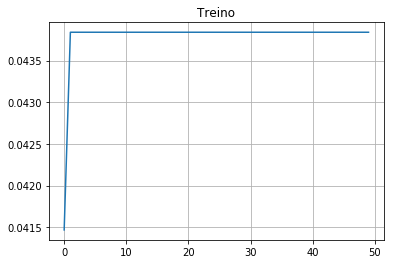

In [16]:
plt.title('Treino')
plt.grid(True)
plt.plot(model.history['acc'])
plt.show()

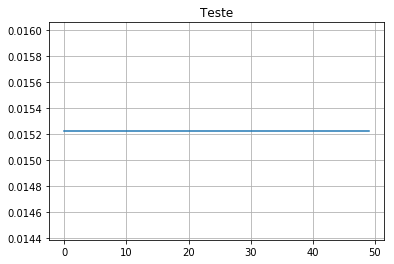

In [17]:
plt.title('Teste')
plt.grid(True)
plt.plot(model.history['val_acc'])
plt.show()

In [29]:
mlp_skl = MLPRegressor(
    hidden_layer_sizes=(2,3,1),
    max_iter=50,
    activation='relu',
    solver='adam'
)

In [30]:
mlp_skl.fit(X_train, y_train)

/home/lucas/fundacao/fundacao/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 3, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
predictions = mlp_skl.predict(X_test)

In [32]:
print('MSE:',mean_squared_error(y_test, predictions))

MSE: 4886.582151977521


In [34]:
print('MSLE:',mean_squared_log_error(y_test, predictions))

MSLE: 13.240243576066325


In [35]:
print('MAE:',mean_absolute_error(y_test, predictions))

MAE: 53.456374386231076
